<a href="https://colab.research.google.com/github/tainakerriou/MachineLearning/blob/main/GoEmotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORT THE DATA SET AND THE PACKAGE


In [1]:
!pip install datasets
import numpy as np
import pandas as pd
import os
import tensorflow as tf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

try:
    from unidecode import unidecode
except ModuleNotFoundError:
    !pip install unidecode
    from unidecode import unidecode
     

In [3]:

try:
    import datasets
except ModuleNotFoundError:
    !pip install datasets
    import datasets
     

In [5]:
from datasets import load_dataset


dataset = load_dataset('go_emotions','raw')
emotions = [
 'admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']      
     

  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:

id_label = {str(i):label for i, label in enumerate(emotions)}
label_id = {label:str(i) for i, label in enumerate(emotions)}

id_label



{'0': 'admiration',
 '1': 'amusement',
 '2': 'anger',
 '3': 'annoyance',
 '4': 'approval',
 '5': 'caring',
 '6': 'confusion',
 '7': 'curiosity',
 '8': 'desire',
 '9': 'disappointment',
 '10': 'disapproval',
 '11': 'disgust',
 '12': 'embarrassment',
 '13': 'excitement',
 '14': 'fear',
 '15': 'gratitude',
 '16': 'grief',
 '17': 'joy',
 '18': 'love',
 '19': 'nervousness',
 '20': 'optimism',
 '21': 'pride',
 '22': 'realization',
 '23': 'relief',
 '24': 'remorse',
 '25': 'sadness',
 '26': 'surprise',
 '27': 'neutral'}

In [7]:

df_train=pd.DataFrame.from_dict(dataset["train"])



#CLEAN THE DATASET

##Normalize the dataset
Normalizing characters
Some of the tools we'll be using later cannot flawlessly handle all unicode characters. To avoid problems, we will normalize all characters to their closest ASCII equivalent using the function unidecode (imported from unidecode package).

The function basically replaces all characters bearing diacritic signs with their corresponding plain character, as well as any symbols with close ASCII equivalents. The result is a text with no accents, cedillas, no € symbol, etc.

In [8]:

df_train['text']= df_train['text'].map(lambda x: unidecode(x))

df_train

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn't be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,1.547634e+09,16,False,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you've imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,1.548553e+09,15,False,0,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,1.547684e+09,70,False,1,...,0,0,0,0,0,0,0,0,0,0
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,1.547169e+09,4,False,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:

df_train["labels"] = df_train[emotions].values.tolist()
df_train.head(10)

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,labels
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,>sexuality shouldn't be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,Right? Considering it's such an important docu...,eespn2i,ImperialBoss,TrueReddit,t3_aizyuz,t1_eesoak0,1.548280e+09,61,False,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,"He isn't as big, but he's still quite popular....",eczuekb,Rallings,cringe,t3_abeksv,t1_eczsmp8,1.546320e+09,3,False,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
7,That's crazy; I went to a super [RELIGION] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,1.546536e+09,23,False,0,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,that's adorable asf,ef961hv,RedRails1917,traaaaaaannnnnnnnnns,t3_akz2ia,t3_akz2ia,1.548764e+09,73,False,0,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",edl7cr3,Tiagulus,youtubehaiku,t3_acuvb0,t1_edc21ip,1.546984e+09,54,False,0,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


##Understanding our dataset
We don't want to have duplicate data because it can false our accuracy when we will test our model

In [10]:
nb=len(df_train.groupby(['text']))
nb2=len(df_train['text'])

print("nombre de texte different: "+str(nb))
print("nombre de texte: "+str(nb2))


nombre de texte different: 57715
nombre de texte: 211225


In [11]:
df_train.drop_duplicates(subset ="text", keep = 'first', inplace=True)
nb=len(df_train.groupby(['text']))
nb2=len(df_train['text'])

print("nombre de texte different: "+str(nb))
print("nombre de texte: "+str(nb2))


nombre de texte different: 57715
nombre de texte: 57715


In [12]:
df_train_clean=pd.concat([df_train['text'],df_train['labels']],axis=1)
df_train_clean

,text,labels
0,That game hurt.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,>sexuality shouldn't be a grouping category I...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"You do right, if you don't care then fuck 'em!","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Man I love reddit.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[NAME] was nowhere near them, he was by the Fa...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
211086,He called [NAME] to the Steelers and was outsp...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
211088,I didn't even notice that one. I noticed the b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
211094,"Thanks, [NAME]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
211095,Everyone likes [NAME].,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [13]:

def isnulle(table):
  for i in range(28):
    if table[i]==1:
      return False
  return True
     



df_train_clean["labels"]=df_train_clean["labels"].map(lambda x: np.nan if (isnulle(x)) else x)
        





       
    

In [14]:
df_train_clean=df_train_clean.dropna()

df_train_clean

,text,labels
0,That game hurt.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"You do right, if you don't care then fuck 'em!","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Man I love reddit.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[NAME] was nowhere near them, he was by the Fa...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,Right? Considering it's such an important docu...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
211086,He called [NAME] to the Steelers and was outsp...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
211088,I didn't even notice that one. I noticed the b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
211094,"Thanks, [NAME]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
211095,Everyone likes [NAME].,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [15]:
def decode_emotion(table):
  return table.index(1)

decode_emotion(df_train_clean["labels"][0])

25

In [16]:

  df_train_clean["index_label"]=df_train_clean["labels"].map(lambda x: decode_emotion(x))
  df_train_clean


<ipython-input-16-bd60b32efae2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean["index_label"]=df_train_clean["labels"].map(lambda x: decode_emotion(x))


,text,labels,index_label
0,That game hurt.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25
2,"You do right, if you don't care then fuck 'em!","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27
3,Man I love reddit.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18
4,"[NAME] was nowhere near them, he was by the Fa...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27
5,Right? Considering it's such an important docu...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15
...,...,...,...
211086,He called [NAME] to the Steelers and was outsp...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
211088,I didn't even notice that one. I noticed the b...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27
211094,"Thanks, [NAME]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15
211095,Everyone likes [NAME].,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18


So we know that our dataset has more of some emotion than other. So we are conscious that can be a kins of bias. 

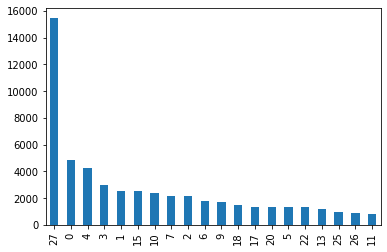

In [17]:
df_train_clean["index_label"].value_counts()[:20].plot(kind= 'bar')

In [18]:
len(df_train_clean["labels"])

56872

###Split the data set into train and test set 


In [19]:
from sklearn.model_selection import train_test_split

val_set=df_train_clean[:5000].reset_index()
traintest=df_train_clean[:42654].reset_index()
train=df_train_clean[5000:39537].reset_index()
target=df_train_clean["labels"][5000:39537].reset_index()
test=df_train_clean[39537:].reset_index()
X_train, X_test, y_train, y_test = train_test_split(train['text'], train['labels'], test_size=0.33, random_state=42)


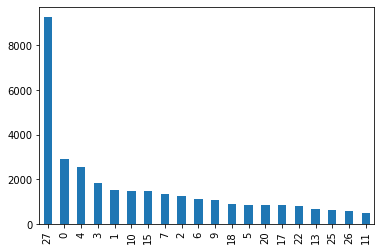

In [22]:
train["index_label"].value_counts()[:20].plot(kind= 'bar')

### Creating a TF dataset

The current dataset object is not in the format recognized by TensorFlow.
The `datasets` library provides a method to convert individual samples to the tensorflow format:

In [23]:
SEED=32
BATCH_SIZE=32

import tensorflow_datasets as tfds
tf.keras.utils.set_random_seed(SEED)
from datasets import Dataset     
tf_dataset = Dataset.from_pandas(train)
#tf_dataset = df_train_clean.to_numpy()
train_tf = tf_dataset .to_tf_dataset(
            columns=["text"],
            label_cols=["labels"],
            batch_size=BATCH_SIZE,
            shuffle=True
            )

tf_dataset = Dataset.from_pandas(test)
#tf_dataset = df_train_clean.to_numpy()
test_tf = tf_dataset .to_tf_dataset(
            columns=["text"],
            label_cols=["labels"],
            batch_size=BATCH_SIZE,
            shuffle=True
            )

tf_val = Dataset.from_pandas(val_set)
#tf_dataset = df_train_clean.to_numpy()
val_tf = tf_val.to_tf_dataset(
            columns=["text"],
            label_cols=["labels"],
            batch_size=BATCH_SIZE,
            shuffle=True
            )




In [ ]:
train_tf.cardinality()

In [ ]:
val_tf.cardinality()


#Lets Build our first Model
## Text classification with RNNs

As it is a sentence I see a similitude with our lab with moovie critisme but this time we have mutliple labels 

## Text encoding layers
### Text vectorization

####Creating and fitting the vectorizer

First we create the layer, with default parameters. We need to inform an upper limit to the vocabulary size, using the keyword argument `max_tokens`:

In [49]:
VOCAB_SIZE = 1000
# set the max_tokens argument to VOCAB_SIZE
encoder = tf.keras.layers.TextVectorization(
     max_tokens=VOCAB_SIZE
    )

encoder

This encoder is fitted in an unsupervised manner: we only use the texts, not the labels. Moreover, this encoder needs to be fully fitted prior to training of any subsequent NN models (since it defines the vector space on which NN models will work). In keras, this type of training uses a different method: .adapt (instead of fit).

In [50]:
train_tf_txt = train_tf.map(lambda text, label: text)
encoder.adapt(train_tf_txt)

In [51]:
vocab = np.array(encoder.get_vocabulary())
len(vocab)

1000

### Word embedding
An embedding layer stores one vector per word. When called, it converts the sequences of word indices to sequences of vectors.


In [52]:
# set seed for reproducibility
tf.keras.utils.set_random_seed(SEED)

# TODO check the documentation and complete the call
embedding = tf.keras.layers.Embedding(
      input_dim=len(vocab),    # set the input dimension to be the length of the encoder vocabulary   
      output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True)

In [29]:
print(embedding.supports_masking)

True


##LSTM Model
###Creating the layer
The code bellow creates a [`tf.keras.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) layer that represents words with 64-dimensional vectors (as set via the argument `output_dim`):

In [148]:
# set seed for reproducibility
tf.keras.utils.set_random_seed(SEED)

# TODO complete the call bellow
model = tf.keras.Sequential([
    # We reuse the encoder and embedding layers previously created
    encoder,
    embedding,
    # TODO add a bidirectional LSTM layer with 64 units
    tf.keras.layers.Bidirectional( tf.keras.layers.LSTM(64)),
    # TODO add a dense layer with 64 units and relu activation
    #tf.keras.layers.Dense(128,activation='relu'),
    #f.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(64,activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    # TODO add an output layer
    tf.keras.layers.Dense(28)
])



In [149]:
def max_len(x):
    a=x.split()
    return len(a)

max(df_train_clean['text'].apply(max_len))

68

In [150]:
# dictionary to keep history output from fit calls
logs = {}

# directory in which model checkpoints and logs are saved
LOG_DIR = 'logs'

def best_model_path(model_name):
    base_dir  = os.path.join(LOG_DIR, model_name)
    return os.path.join(base_dir, 'best_val_accuracy.ckpt')

def callback_list(model_name):
    base_dir  = os.path.join(LOG_DIR, model_name)
    tb_cb = tf.keras.callbacks.TensorBoard(base_dir)
    ckpt = tf.keras.callbacks.ModelCheckpoint(
         best_model_path(model_name),
         monitor='val_accuracy',
         mode='max', 
         verbose=0,
         save_best_only=True)
    backup_dir = os.path.join(base_dir, 'backup_checkpoint')
    bkp = tf.keras.callbacks.BackupAndRestore(
        backup_dir)
    return [tb_cb, ckpt, bkp]

In [151]:

model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(
    from_logits=True
), metrics="accuracy")


In [152]:
MODEL_NAME = 'LSTM'
logs[MODEL_NAME] = model.fit(
    train_tf,validation_data=val_tf,
    epochs=0,
   callbacks=callback_list(MODEL_NAME)
    )

### Tensorboard

In [153]:

model.evaluate(test_tf)

542/542 [==============================] - 9s 7ms/step - loss: 0.6840 - accuracy: 0.0173


[0.6839852929115295, 0.017306027933955193]

In [154]:
i=0
text=test["text"][i]
print("target:"+str(test["index_label"][i]))
model.predict([text])

target:27


1/1 [==============================] - 2s 2s/step


array([[-0.00920261, -0.02495304, -0.04991765,  0.01164223, -0.00534186,
        -0.00070493, -0.05901341, -0.03612159, -0.03321191, -0.00283397,
        -0.01993748, -0.03909545, -0.00532539,  0.00165688, -0.01926857,
         0.00829226, -0.03878627,  0.00684286, -0.06204404,  0.01501256,
        -0.02933957, -0.01936478, -0.03480507, -0.0304697 , -0.00729257,
        -0.01472383, -0.01613449, -0.03076391]], dtype=float32)

In [155]:
# set seed for reproducibility
tf.keras.utils.set_random_seed(SEED)

# TODO complete the call bellow
model2 = tf.keras.Sequential([
    encoder,
    embedding,
    # TODO set the LSTM layer to return sequences
    tf.keras.layers.LSTM(64,return_sequences=True),
    # TODO add another Bidirectional LSTM layer with 32 units
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(28)
])


model.summary()

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(
    from_logits=True
))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 bidirectional_22 (Bidirecti  (None, 128)              66048     
 onal)                                                           
                                                                 
 dense_32 (Dense)            (None, 28)                3612      
                                                                 
Total params: 133,660
Trainable params: 133,660
Non-trainable params: 0
_________________________________________________________________


In [157]:

text='You are amazing'
model.predict([text])

1/1 [==============================] - 0s 30ms/step


array([[ 0.01289824, -0.01235825, -0.00885959, -0.00882226, -0.0066576 ,
         0.01070224, -0.00435029,  0.00375921,  0.00450461,  0.01070699,
         0.00405362, -0.00524585, -0.01463099, -0.00772475, -0.00803191,
         0.00471374, -0.0167435 , -0.02289946, -0.00340101, -0.00529577,
        -0.0041251 , -0.00791458,  0.00505782, -0.00865785, -0.00485624,
        -0.00906753,  0.0011027 , -0.00951703]], dtype=float32)

#MODEL MNIST

In [ ]:
model.add(keras.layers.Dense(300, activation="relu"))
     